<a href="https://colab.research.google.com/github/dlbferreira/python-for-data-science-and-machine-learning/blob/main/finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finance Project**

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

**NOTE**: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007–2008) all the way to early 2016.

In [ ]:
#!pip install pandas-datareader

#Get the Data
#Importando Biblioteca
#https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
from pandas_datareader import data, wb
from datetime import datetime
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## **Data**

We need to get data using pandas datareader. We will get stock information for the following banks:
Bank of America

*   CitiGroup
*   Goldman Sachs
*   JPMorgan Chase
*   Morgan Stanley
*   Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**



1.   Use datetime to set start and end datetime objects.
2.   Figure out the ticker symbol for each bank.
3.   Figure out how to use datareader to grab info on the stock.

** Use this [documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**

**#Bank of America**

BAC = data.DataReader("BAC", 'google', start, end)


**WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.**


In [ ]:
#Data
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)


In [ ]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [ ]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [ ]:
# Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [ ]:
# Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. 
# Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [ ]:
# Set the column name levels (this is filled out for you):
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [ ]:
# Check the head of the bank_stocks dataframe.
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.658106
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.418499
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.395836
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.515644
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.512400

[5 rows x 36 columns]

# **EDA**

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) and [Using .xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html). Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project

In [ ]:
# What is the max Close price for each bank's stock throughout the time period?
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns = pd.DataFrame()

In [ ]:
# We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock
# Ticker creates this returns column and set's it as a column in the returns DataFrame.
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


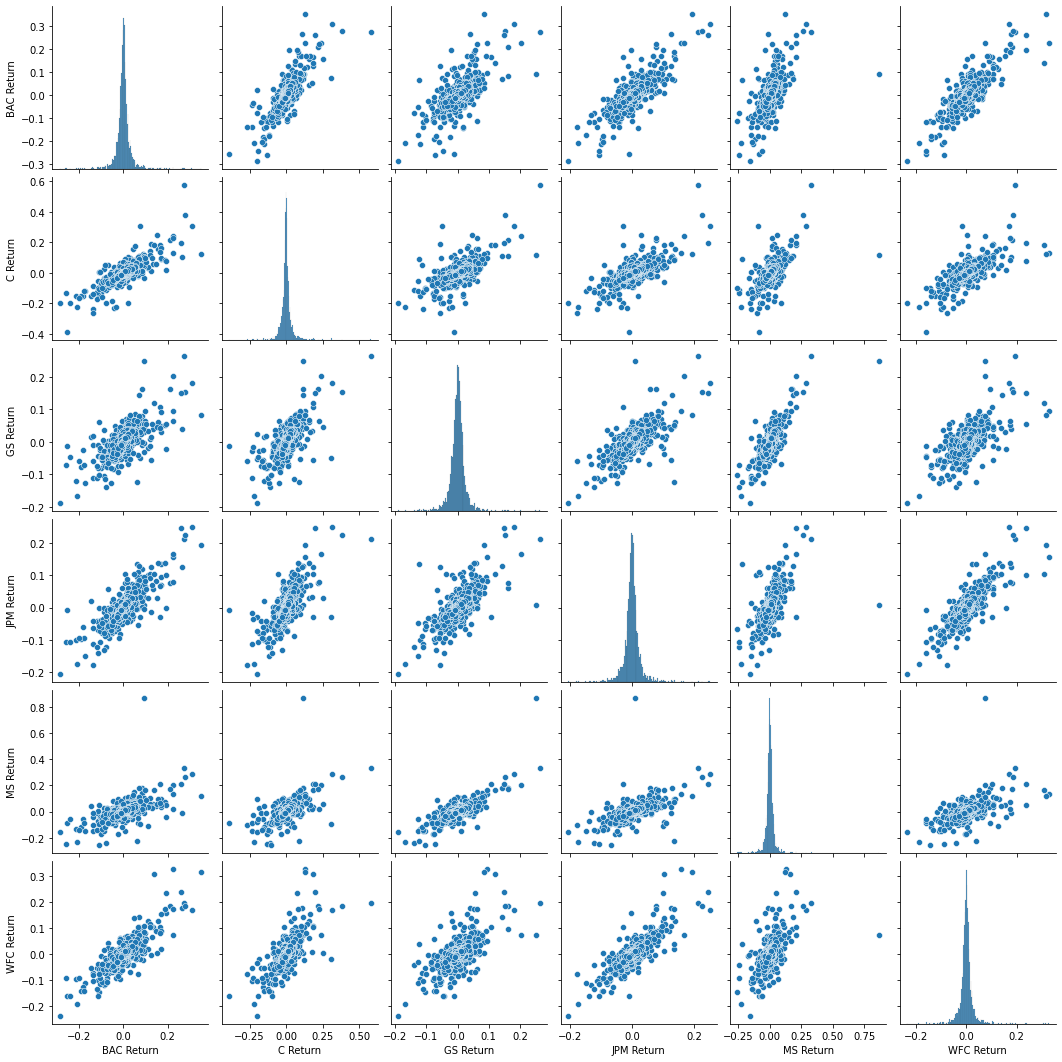

In [ ]:
# Create a pairplot using seaborn of the returns dataframe.
# What stock stands out to you? Can you figure out why?
import seaborn as sns
sns.pairplot(returns[1:])

In [ ]:
# Using this returns DataFrame, figure out on what dates each bank stock had the best and 
# worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
# You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [ ]:
# Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? 
# Which would you classify as the riskiest for the year 2015?
# Citigroup riskiest
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [ ]:
# Very similar risk profiles, but Morgan Stanley or BofA
returns['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


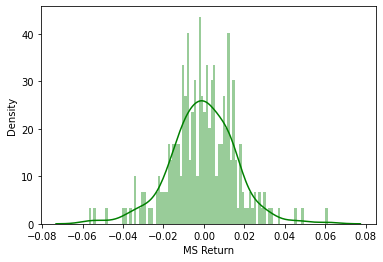

In [ ]:
# Create a distplot using seaborn of the 2015 returns for Morgan Stanley
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


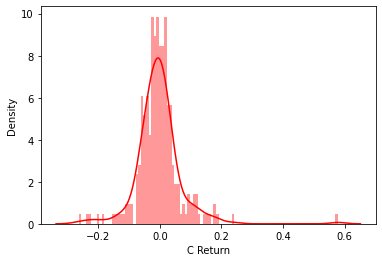

In [ ]:
# Create a distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

## **More Visualization**

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.


In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

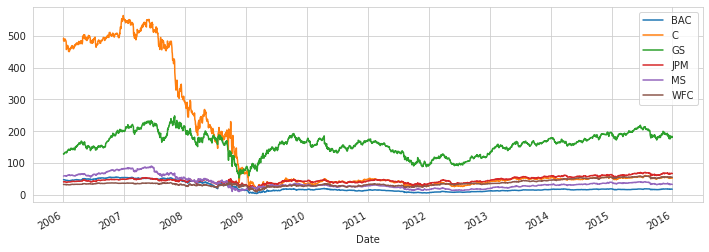

In [ ]:
# Create a line plot showing Close price for each bank for the entire index of time. 
# (Hint: Try using a for loop, or use .xs to get a cross section of the data.)
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

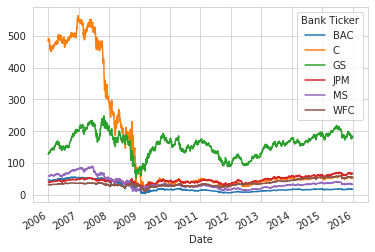

In [ ]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
#from plotly import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.io.renderers.default = 'colab'
import plotly.graph_objects as go

In [ ]:
# plotly
fig = go.Figure(bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot())

## **Moving Averages**

Let's analyze the moving averages for these stocks in the year 2008. 

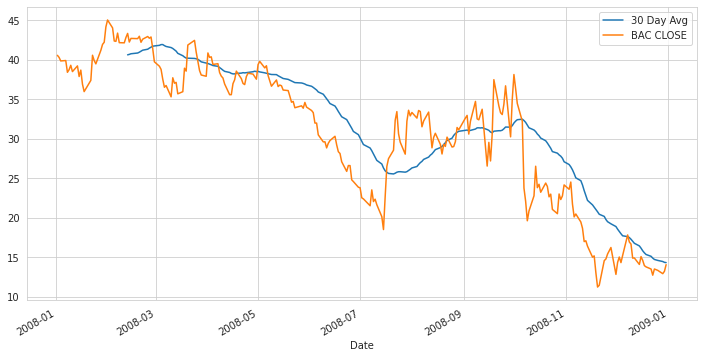

In [ ]:
# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

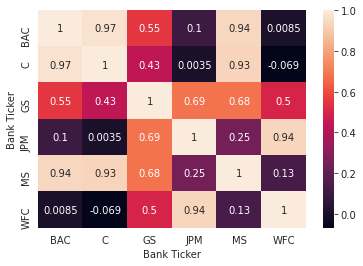

In [ ]:
# Create a heatmap of the correlation between the stocks Close Price.
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

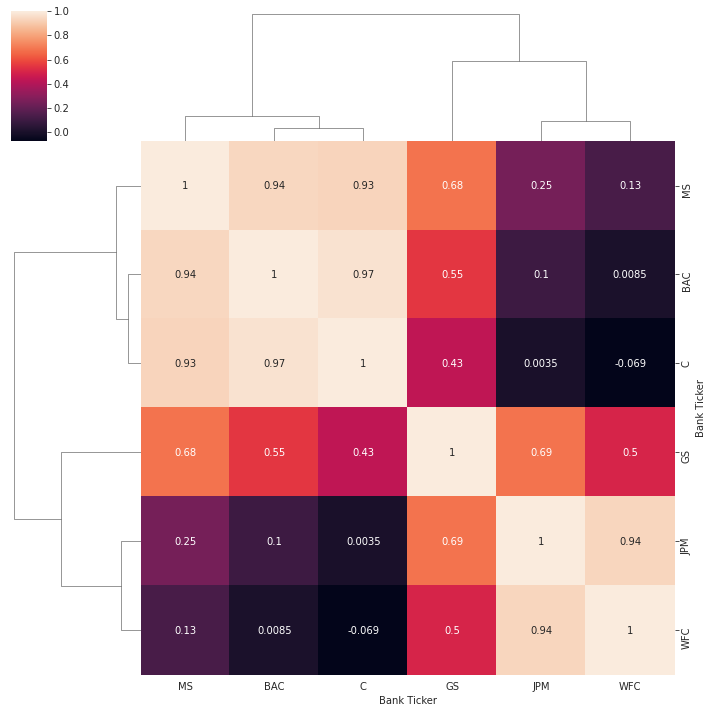

In [ ]:
# Optional: Use seaborn's clustermap to cluster the correlations together:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [ ]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

fig = go.Figure(close_corr.iplot(kind='heatmap',colorscale='rdylbu'))

## **Part 2 (Optional)**

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [ ]:
# Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.
fig = go.Figure(BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle'))

In [ ]:
# Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [ ]:
# Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')